# Advanced House Price Prediction 

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Datasets/HousePricePrediction/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Lets see which features contains null values

<AxesSubplot:>

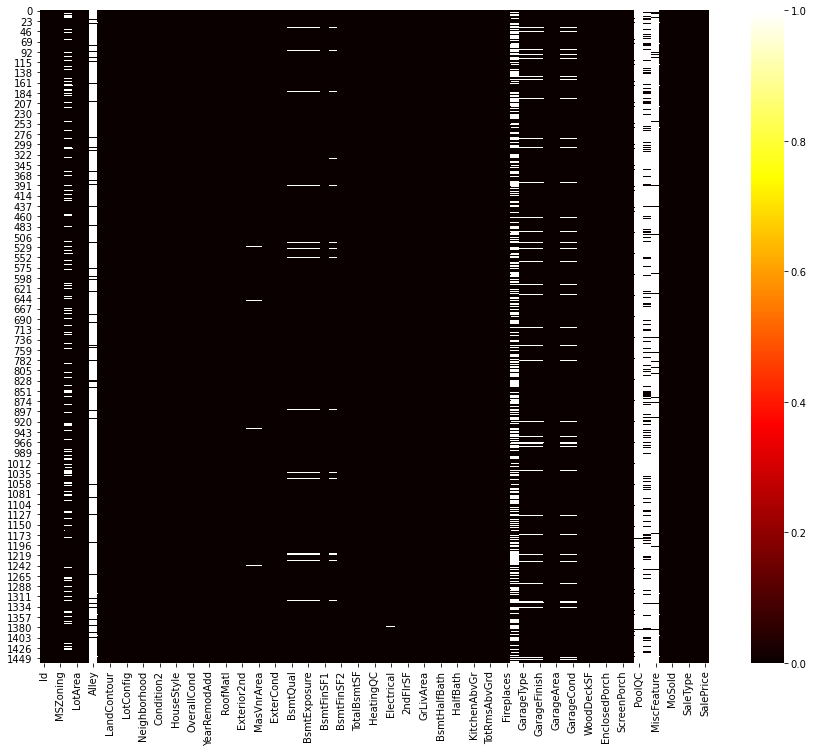

In [3]:
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull(), cmap='hot')

In [4]:
num_feat = [feature for feature in df.columns if df[feature].dtype!='O']
print(len(num_feat), ' Numerical features')
num_feat

38  Numerical features


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [5]:
time_feat = [feature for feature in num_feat if 'Year' in feature or 'Yr' in feature]
time_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [6]:
disc_feat = [feature for feature in num_feat if len(df[feature].unique())<10 and feature not in time_feat]
print(len(disc_feat),' Discrete features')
disc_feat

10  Discrete features


['OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'PoolArea']

In [7]:
cont_feat = [feature for feature in num_feat if feature not in disc_feat and feature not in time_feat]
print(len(cont_feat), ' Continuous features')
cont_feat

24  Continuous features


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [8]:
nan_cont_feat = [feature for feature in cont_feat if df[feature].isnull().sum()>1]
print('there are ', len(nan_cont_feat), 'continuous features with missing value')
nan_cont_feat

there are  2 continuous features with missing value


['LotFrontage', 'MasVnrArea']

In [9]:
df[nan_cont_feat].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
dtype: float64

In [10]:
df[nan_cont_feat].head()

,LotFrontage,MasVnrArea
0,65.0,196.0
1,80.0,0.0
2,68.0,162.0
3,60.0,0.0
4,84.0,350.0


In [11]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [12]:
df['MasVnrArea'] = df['MasVnrArea'].replace({0.0: np.nan})

In [13]:
df['MasVnrArea'].isnull().mean()

0.5952054794520548

In [14]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [15]:
df[nan_cont_feat].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

In [16]:
nan_disc_feat = [feature for feature in disc_feat if df[feature].isnull().sum()>1]
print('There are ', len(nan_disc_feat), ' discrete feature with nan values')
nan_disc_feat

There are  0  discrete feature with nan values


[]

In [17]:
df[disc_feat].head()

,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PoolArea
0,5,1,0,2,1,3,1,0,2,0
1,8,0,1,2,0,3,1,1,2,0
2,5,1,0,2,1,3,1,1,2,0
3,5,1,0,1,0,3,1,1,3,0
4,5,1,0,2,1,4,1,1,3,0


In [18]:
nan_time_feat = [feature for feature in time_feat if df[feature].isnull().sum()>1]
nan_time_feat

['GarageYrBlt']

In [19]:
df[nan_time_feat].isnull().mean()

GarageYrBlt    0.055479
dtype: float64

In [20]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [21]:
cat_feat = [feature for feature in df.columns if df[feature].dtype=='O']
print(len(cat_feat), ' Categorical features')
cat_feat

43  Categorical features


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [22]:
nan_cat_feat = [feature for feature in cat_feat if df[feature].isnull().sum()>1]
print(len(nan_cat_feat), ' categorical features contains missing values')
nan_cat_feat

15  categorical features contains missing values


['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [23]:
df[nan_cat_feat].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN


In [24]:
df[nan_cat_feat].isnull().mean()

Alley           0.937671
MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [25]:
for feature in nan_cat_feat:
    print(feature, ' has ', len(df[feature].unique()), ' unique values')

Alley  has  3  unique values
MasVnrType  has  5  unique values
BsmtQual  has  5  unique values
BsmtCond  has  5  unique values
BsmtExposure  has  5  unique values
BsmtFinType1  has  7  unique values
BsmtFinType2  has  7  unique values
FireplaceQu  has  6  unique values
GarageType  has  7  unique values
GarageFinish  has  4  unique values
GarageQual  has  6  unique values
GarageCond  has  6  unique values
PoolQC  has  4  unique values
Fence  has  5  unique values
MiscFeature  has  5  unique values


### Droping those features which have more than 70% of Missing Values

In [26]:
feat_to_drop = [feature for feature in nan_cat_feat if df[feature].isnull().mean()>0.70]
feat_to_drop

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [27]:
df.drop(columns=feat_to_drop, inplace=True)

In [28]:
for feature in nan_cat_feat:
    if feature in feat_to_drop:
        pass
    else:
        df[feature] = df[feature].fillna(df[feature].mode()[0])

In [29]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

### Checking if any more null values left in the dataset

<AxesSubplot:>

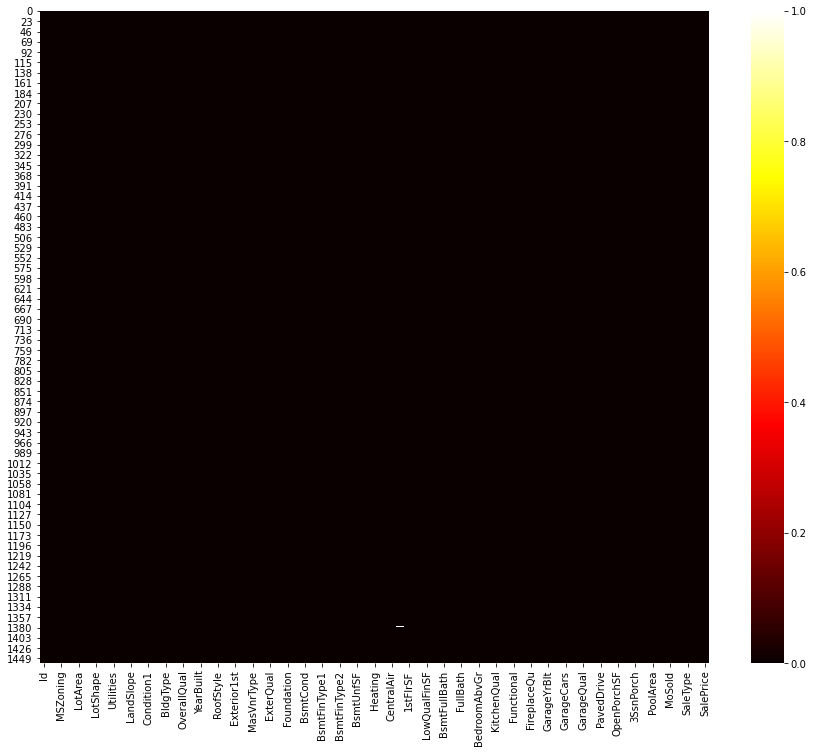

In [30]:
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull(), cmap='hot')

In [31]:
nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]
nan

['Electrical']

In [32]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [33]:
df[time_feat].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [34]:
df['YearBuilt'] = df['YrSold'] - df['YearBuilt']
df['YearRemodAdd'] = df['YrSold'] - df['YearRemodAdd']
df['GarageYrBlt'] = df['YrSold'] - df['GarageYrBlt']

In [35]:
df.drop('YrSold', axis=1, inplace=True)

In [36]:
df.to_csv('D:/Datasets/HousePricePrediction/formatedTrain.csv', index=False)